 ## Flow and Possible Ideas
 - Show bar chart of the number of paintings by each artist
 - Use DAISY for geometric patterns
 - Find some process for analyzing color in the images (color feature extraction)
 - Find which two paintings are most similar, like the faces.
 - Pull some paintings out from each or a couple artists. After building model, run these through to see if the model correctly recognizes the artist
 - Run a painting from a different artist through the model to see if we can determine similar genres
 - Can we find a painting from someone not in the set to run through and see who it is most similar to?

# Lab Assignment Two: Exploring Image Data
by:
* Hayden Donofrio
* Riley Bates
* Chandler Choate

## Section 1: Business Understanding


For this lab on exploring image data, our group chose a dataset called [The Best Artworks of All Time,](https://www.kaggle.com/ikarus777/best-artworks-of-all-time) which is comprised of various pieces from 50 artists that the creator suggested as the most influential of all time. In addition to the images of these paintings, the dataset also includes data on each of the artists, such as the genre(s) or artistic movement that they were associated with, their nationality, a brief biography scraped from wikipedia, and the number of their paintings included in the dataset.

The most exciting opportunities for this dataset would be classifying images by artist or genre through geometric patterns and/or colors. For example, we would be able to upload a picture (not from one of the 50 artists) and run it through our model to determine which artist it is most similar to. Alternatively, we could determine the genre that the picture is the closest to, such as Expression or Surrealism. This would be very interesting to the artistic community; for example, a fine arts department at a university could use our model in order to analyze their students work and determine which well-known artist their work is most similar. Our model could also be used to determine the similarity of the artists in the dataset and to what degree of confidence from clustering in the model.

Our model could be tested with other works of art by these 50 artists that are not included in the dataset. Additionally, it could be tested against different artists that were widely considered to be a part of the same genre. To be of interest to the artistic and educational communities however, our model would have to perform fairly well. Although difficult to quantify performance, we would desire a high degree of confidence or percentage similarity between two pieces. Although art is largely subjective, our model may be a way to study art more deterministically and numerically. 

In addition to the base similarity result, the reasoning between the model's prediction may need to be given to be of use to the artistic community. For example, knowing that a student's painting is similar to a work by Dali may not be helpful in of itself, unless they know that this is based on the use of certain geometric patterns, etc.

## Section 2: Data Preparation

[Color Identification](https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)
<br>
[Read image files into numpy arrays](https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('artists.csv') 
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [16]:
import plotly.graph_objs as go
import plotly.express as px

fig = px.bar(df, x='name', y='paintings', hover_data=['paintings'], color='paintings',
             labels={'paintings':'Number of Paintings', 'name':'Artist Name'})
fig.update_layout(title_text='Number of Paintings by Artist')
fig.show()

In [24]:
fig = go.Figure(data=[go.Bar(
            x=df['genre'], y=df['genre'].value_counts(), 
        )])

fig.update_layout(title_text='Number of Paintings by Genre')
fig.show()

### Read in images as numpy arrays then resize and recolor

Working with 8355 images
Image examples: 
Edgar_Degas_455.jpg


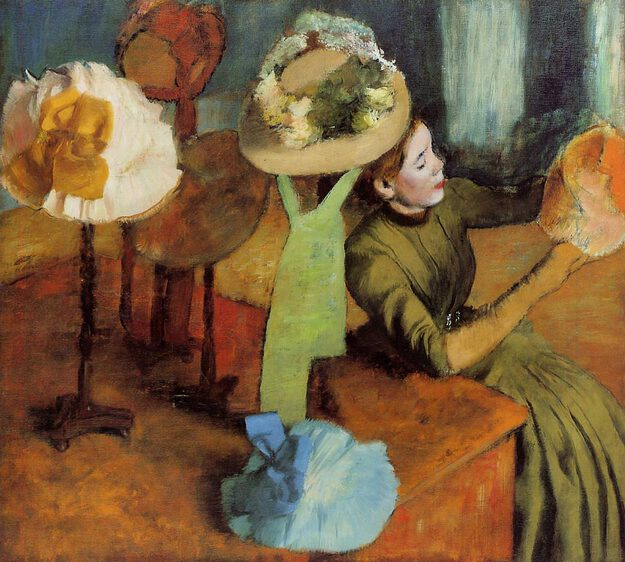

Edgar_Degas_333.jpg


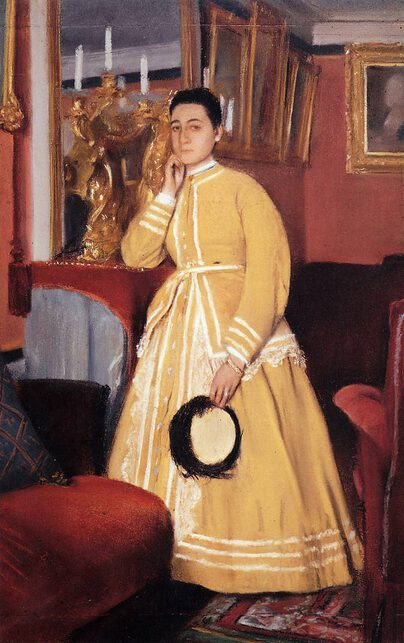

In [33]:
### import images code reused from kaggle.com: https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

folder = "resized"

images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(images)))
print("Image examples: ")

for i in range(3, 5):
    print(images[i])
    display(_Imgdis(filename=folder + "/" + images[i], width=240, height=320))

###

**Not sure if this is what we want below**

In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in images:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 120, 160))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")


### Linearize images to create 1-D image feature table

### Example image visualizations

## Section 3: Data Reduction


### Linear Dimensionality Reduction with PCA

In [ ]:
# Explained variance plot
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

pca = PCA(n_components=4)
X_pca = pca.fit(X)
plot_explained_variance(pca)

**How many dimensions necessary to adequately represent image?**

### Non-linear Dimensionality Reduction 

Kernel PCA

### Which method is better?

**Compare the representation using non-linear dimensions to using linear dimensions. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components. Be aware that mean-squared error may not be a good measurement for kPCA.  Do you prefer one method over another? Why?**

### DAISY Image Features

**Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.**

## Section 4: Additional Analysis

**See top**